/tmp/ipykernel_4004/672362133.py:19: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(labels, rotation=45, ha="right")
/tmp/ipykernel_4004/672362133.py:19: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(labels, rotation=45, ha="right")


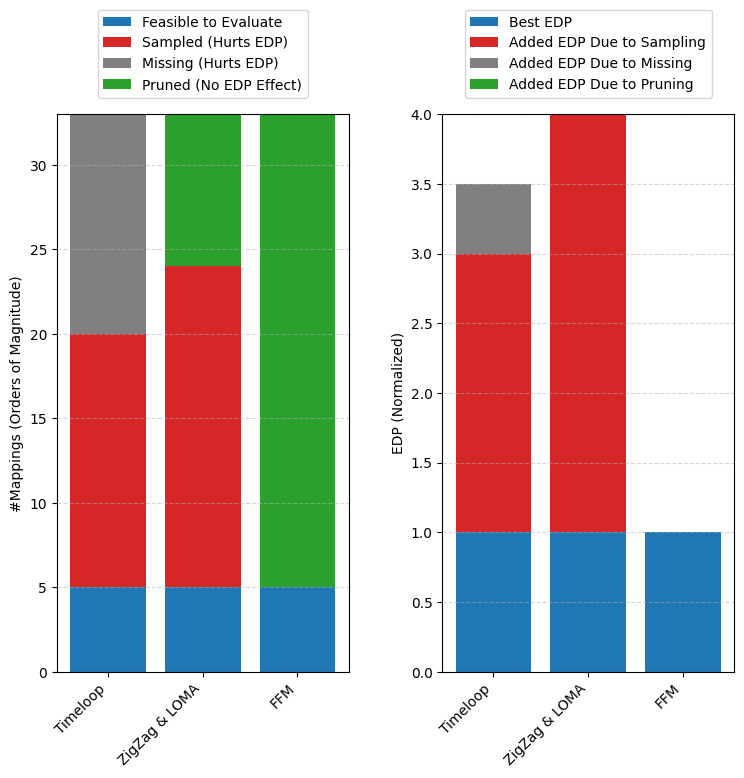

In [102]:
import matplotlib.pyplot as plt
plt.style.use("default")

# 2 side-by-side plots
fig, axs = plt.subplots(1, 2, figsize=(8, 8))
# Increase separation between plots
fig.subplots_adjust(wspace=2)

def make_stacked_bar_chart(results: dict[str, list[float]], categories: list[str], ax: plt.Axes):
    labels = list(results.keys())
    data = list(zip(*results.values()))
    colors = ['#1f77b4', '#d62728', 'gray', '#2ca02c']
    bottom = [0] * len(labels)
    for cat, vals, color in zip(categories, data, colors):
        ax.bar(labels, vals, label=cat, bottom=bottom, color=color)
        bottom = [b + v for b, v in zip(bottom, vals)]
    ax.grid(axis="y", linestyle="--", alpha=0.5)
    ax.legend(loc="upper center", bbox_to_anchor=(0.5, 1.2), ncol=1)
    ax.set_xticklabels(labels, rotation=45, ha="right")

results = {
    "Timeloop": [5, 15, 13, 0],
    "ZigZag & LOMA": [5, 19, 0, 9],
    "FFM": [5, 0, 0, 28],
}
# assert len(set(sum(r) for r in results.values())) == 1, "Sum of results must be equal"

ax = axs[0]
categories = ["Feasible to Evaluate", "Sampled (Hurts EDP)", "Missing (Hurts EDP)", "Pruned (No EDP Effect)"]
make_stacked_bar_chart(results, categories, ax)
ax.set_ylabel("#Mappings (Orders of Magnitude)")

results2 = {
    "Timeloop": [1, 2, .5, 0],
    "ZigZag & LOMA": [1, 3, 0, 0],
    "FFM": [1, 0, 0, 0],
}

ax = axs[1]
categories = ["Best EDP", "Added EDP Due to Sampling", "Added EDP Due to Missing", "Added EDP Due to Pruning"]
make_stacked_bar_chart(results2, categories, ax)
ax.set_ylabel("EDP (Normalized)")

plt.tight_layout()
plt.show()
